In [1]:
import pandas as pd
import numpy as np
import seaborn

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import xgboost as xgb

In [4]:
data = pd.read_csv('04_22.csv')

In [5]:
data

,Unnamed: 0,pastHP-AP,pastHG-AG,pastAGC-HGC,pastHS-AS,pastHST-AST,pastASC-HSC,pastASTC-HSTC,HomeFullPoint,AwayFullPoint,HomeGoal,AwayGoal,HomeConceded,AwayConceded,HomeAvgPoint,AwayAvgPoint,FTR
0,30,1.199006,-0.325458,1.672309,0.092964,0.072379,0.371667,0.741030,3.063633,-0.719519,-0.001163,-0.030735,-3.109829,1.543916,3.950040,-0.934438,H
1,31,0.459169,0.850221,-1.134070,0.545853,0.878015,-1.007148,-2.061876,0.253267,-0.719519,1.293817,-0.674108,2.663004,-0.768541,0.295855,-0.934438,H
2,32,-2.130261,-1.501137,-0.733159,-1.175124,-2.183401,-0.087938,-0.248231,-1.932574,1.150657,-1.296144,1.256011,-0.030984,0.773097,-2.546289,1.511995,H
3,33,1.199006,1.634007,0.068664,-0.178769,-0.411002,0.831272,0.741030,-0.058996,-1.966302,1.941308,-1.317481,2.278149,1.543916,-0.110165,-2.565393,H
4,34,-1.760342,-1.893029,-0.332247,-0.903391,-2.022274,-2.477883,-2.721384,-1.308048,3.020833,-0.001163,5.116251,0.738727,0.002278,-1.734247,3.958427,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,6835,-0.650587,0.066435,0.068664,0.002387,-0.088748,0.463588,0.081522,-0.278424,0.341932,-0.018663,0.369200,-0.239014,0.418937,-0.568679,1.572887,H
6296,6836,1.568924,2.025900,1.271398,-0.631657,0.394634,0.923193,-0.248231,-0.075875,-0.567883,0.453830,-0.413281,0.509894,0.856429,0.195355,-0.400564,H
6297,6837,1.938843,0.850221,1.672309,1.632786,0.716888,1.382798,0.246399,1.949614,-0.011885,2.186304,-0.674108,-1.549604,-0.581044,1.332010,-0.472847,H
6298,6838,0.829087,2.025900,-0.332247,1.179897,0.072379,1.290877,0.741030,2.000251,-0.315156,2.448800,0.004042,-1.612013,0.106443,1.317743,-0.457190,H


In [6]:
def runKFold(l, m, n, L1, L2):
    x = data[['pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS', 'pastHST-AST', 'pastASC-HSC', 'pastASTC-HSTC', 
              'HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','HomeAvgPoint','AwayAvgPoint']]
    Y = data[['FTR']]
    label_encoder = LabelEncoder()
    label_encoder = label_encoder.fit(Y)
    label_encoded_y = label_encoder.transform(Y)
    y = label_encoded_y
    param_init = {
    "objective": 'multi:softmax',
    "reg_alpha" : L1,
    "reg_lambda" : L2,
    "penalty" : "L2",
    "booster": "gbtree",
    "max_depth": l, # default: 3 only for depthwise
    "n_estimators": m, # default: 500
    "learning_rate": n, # default: 0.05
    "subsample": 0.7,
    "colsample_bytree": 1,  # default:  1.0
    "colsample_bylevel": 1, # default: 1.0
    "validate_parameters": 1,
    "random_state": 0,
 
    #
    "silent": True,
    "n_jobs": -1, 
 
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default depthwise
}
    xgb_model = xgb.XGBClassifier(**param_init)
    kfold = StratifiedKFold(n_splits=17)
    X = x[0:5950]
    Y = y[0:5950]
    results = cross_val_score(xgb_model, X, Y, cv=kfold)
    acc = results.mean()
    return acc

In [7]:
runKFold(6, 25, 0.1, 1, 1)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:48:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:48:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:48:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:48:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:48:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

0.524873949579832

In [9]:
def CrossValPLT(a, b, c, d, i, j, k, l, L1, L2):
    val_50_1_1 = runKFold(a, i, 0.1, L1, L2)
    val_50_1_2 = runKFold(a, j, 0.1, L1, L2)
    val_50_1_3 = runKFold(a, k, 0.1, L1, L2)
    val_50_1_4 = runKFold(a, l, 0.1, L1, L2)
    val_50_2_1 = runKFold(b, i, 0.1, L1, L2)
    val_50_2_2 = runKFold(b, j, 0.1, L1, L2)
    val_50_2_3 = runKFold(b, k, 0.1, L1, L2)
    val_50_2_4 = runKFold(b, l, 0.1, L1, L2)
    val_50_3_1 = runKFold(c, i, 0.1, L1, L2)
    val_50_3_2 = runKFold(c, j, 0.1, L1, L2)
    val_50_3_3 = runKFold(c, k, 0.1, L1, L2)
    val_50_3_4 = runKFold(c, l, 0.1, L1, L2)
    val_50_4_1 = runKFold(d, i, 0.1, L1, L2)
    val_50_4_2 = runKFold(d, j, 0.1, L1, L2)
    val_50_4_3 = runKFold(d, k, 0.1, L1, L2)
    val_50_4_4 = runKFold(d, l, 0.1, L1, L2)
    x1 = 'max_depth=' + str(a)
    x2 = 'max_depth=' + str(b)
    x3 = 'max_depth=' + str(c)
    x4 = 'max_depth=' + str(d)
    y1 = 'n_estimator=' + str(i)
    y2 = 'n_estimator=' + str(j)
    y3 = 'n_estimator=' + str(k)
    y4 = 'n_estimator=' + str(l)
    objects = (x1, x2, x3, x4)
    y_pos = np.arange(len(objects))
    plt.rcParams['figure.figsize'] = [32, 8]
    plt.rcParams['font.size'] = '20'
    xgb1 = [val_50_1_1, val_50_2_1, val_50_3_1, val_50_4_1]
    xgb2 = [val_50_1_2, val_50_2_2, val_50_3_2, val_50_4_2]
    xgb3 = [val_50_1_3, val_50_2_3, val_50_3_3, val_50_4_3]
    xgb4 = [val_50_1_4, val_50_2_4, val_50_3_4, val_50_4_4]
    for index, value in enumerate(xgb1):
        plt.text(index - 0.44, value + 0.01, str("{:.3f}".format(value)), fontsize=20)
    for index, value in enumerate(xgb2):
        plt.text(index - 0.2, value + 0.01, str("{:.3f}".format(value)), fontsize=20)
    for index, value in enumerate(xgb3):
        plt.text(index + 0.04, value + 0.01, str("{:.3f}".format(value)), fontsize=20)
    for index, value in enumerate(xgb4):
        plt.text(index + 0.28, value + 0.01, str("{:.3f}".format(value)), fontsize=20)
    bars_sigmoid = plt.bar(y_pos - 0.36, xgb1, 0.24, label = y1, color = 'red')
    plt.bar(y_pos - 0.12, xgb2, 0.24, label = y2, color = 'orange')
    bars_linear = plt.bar(y_pos + 0.12, xgb3, 0.24, label = y3, color = 'yellow')
    bars_xyz = plt.bar(y_pos + 0.36, xgb4, 0.24, label = y4, color = 'brown')
    plt.xticks(y_pos, objects)
    plt.ylim([0, 1.1])
    plt.ylabel("Tuning hyparameters")
    plt.xlabel("Number of max depth in model")
    patterns = ("o", "o", "o", "o")
    for i, x in zip(bars_sigmoid,patterns):
        i.set_hatch(x)
    patterns = ("\\", "\\", "\\", "\\")
    for i, x in zip(bars_linear,patterns):
        i.set_hatch(x)
    patterns = ("x", "x", "x", "x")
    for i, x in zip(bars_xyz,patterns):
        i.set_hatch(x)
    plt.legend(fontsize = 20)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:51:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:51:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:51:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:51:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:51:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:52:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:52:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:52:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:52:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:52:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:52:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:52:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:52:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:52:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:53:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:53:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:53:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:53:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

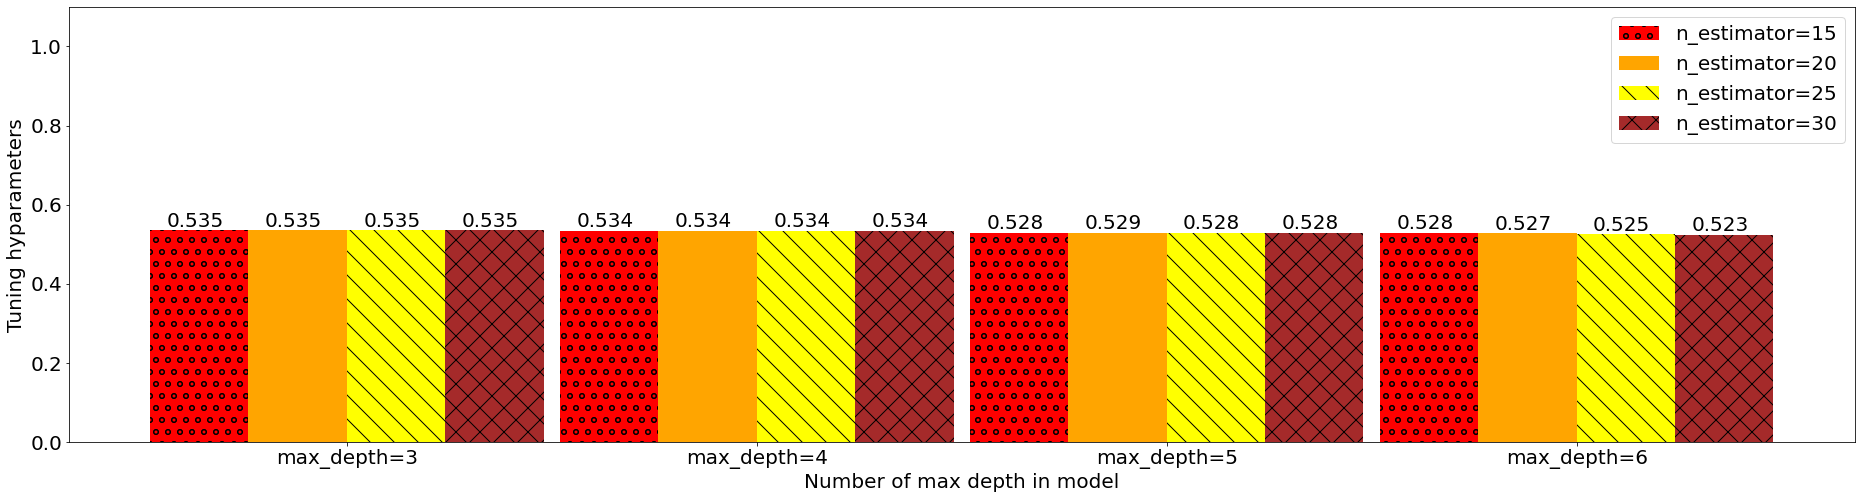

In [10]:
CrossValPLT(3, 4, 5, 6, 15, 20, 25, 30, 1, 1)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:53:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:53:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:53:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:53:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:54:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:54:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:54:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:54:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:54:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:54:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:54:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:54:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:54:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:54:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:54:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:55:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:55:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:55:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:55:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:55:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:55:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:55:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:55:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:55:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:55:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:55:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:55:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:55:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:55:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[23:55:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "p

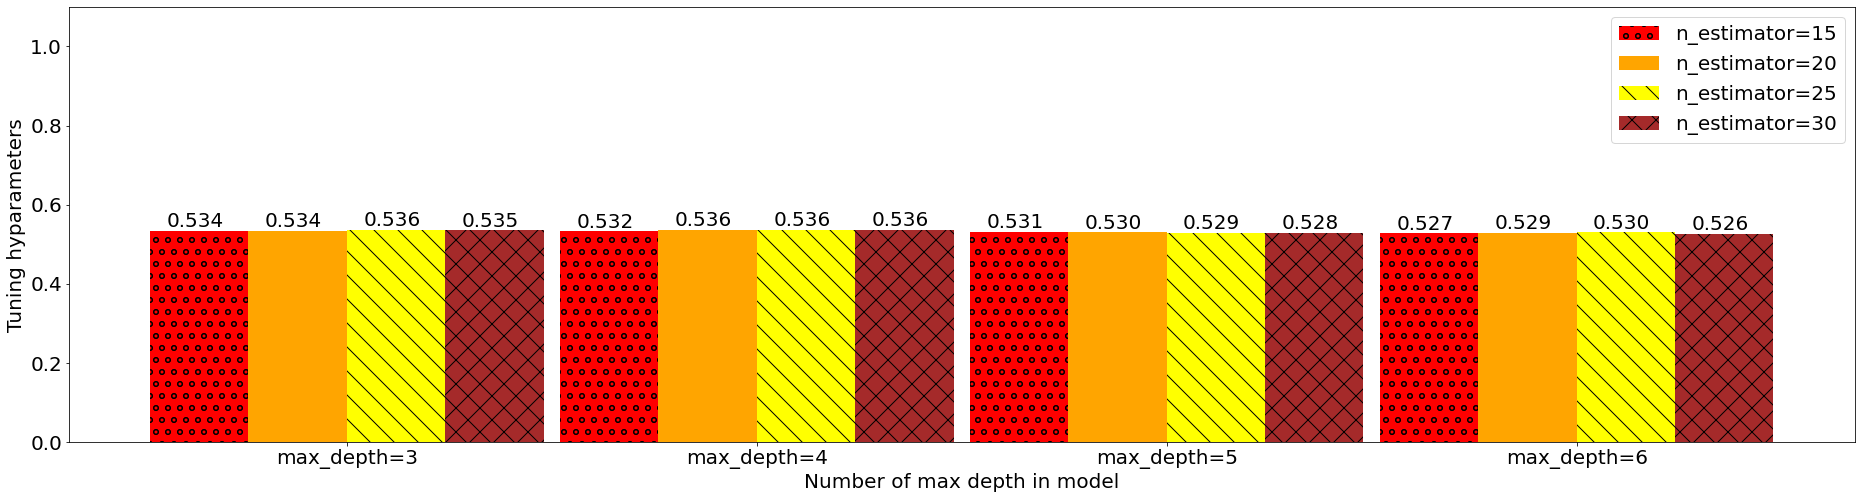

In [11]:
CrossValPLT(3, 4, 5, 6, 15, 20, 25, 30, 0, 1)

In [ ]:
CrossValPLT(7, 8, 9, 10, 15, 20, 25, 30, 0, 1)

In [ ]:
CrossValPLT(3, 4, 5, 6, 35, 40, 45, 50, 0, 1)

In [ ]:
def runXGB(i, j, k, l, m, n):
    x = data[['pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS', 'pastHST-AST', 'pastASC-HSC',
        'pastASTC-HSTC', 'HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','HomeAvgPoint','AwayAvgPoint']]
    Y = data[['FTR']]
    label_encoder = LabelEncoder()
    label_encoder = label_encoder.fit(Y)
    label_encoded_y = label_encoder.transform(Y)
    y = label_encoded_y
    c = (i-2004)*350
    t = (j-4)*10
    q = k*10
    x_train = x[0:c]
    y_train = y[0:c]
    x_test = x[c+t:c+q]
    y_test = y[c+t:c+q]
    param_init = {
    "objective": 'multi:softmax',
    "penalty": 'L2',
    "reg_alpha" : 0,
    "reg_lambda" : 1,
    "booster": "gbtree",
    "max_depth": l, # default: 3 only for depthwise
    "n_estimators": m, # default: 500
    "learning_rate": n, # default: 0.05
    "subsample": 0.7,
    "colsample_bytree": 1,  # default:  1.0
    "colsample_bylevel": 1, # default: 1.0
    "validate_parameters": 1,
    "random_state": 0,
 
    #
    "silent": True,
    "n_jobs": -1, 
 
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default depthwise
}
    xgb_model = xgb.XGBClassifier(**param_init)
    eval_set = [(x_train, y_train), (x_test, y_test)]
    clf_XGB = xgb_model.fit(x_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, early_stopping_rounds=10, verbose=True)
    predictions = xgb_model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results = xgb_model.evals_result()
    logloss = results['validation_1']['mlogloss'][-1]
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
    ax.legend()
    title1 = 'XGBoost Log Loss' + '-' + 'Max_depth' + ':' + str(l) + 'N_estimator' + ':' + str(m)
    pyplot.ylabel('Log Loss')
    pyplot.title(title1)
    pyplot.show()
    # plot classification error
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    title2 = 'XGBoost Classfication Ẻrror' + '-' + 'Max_depth' + ':' + str(l) + 'N_estimator' + ':' + str(m)
    pyplot.ylabel('Classification Error')
    pyplot.title(title2)
    pyplot.show()
    string = 'model' + '_' + 'max_depth' + '_' + str(l) + '_' + 'n_estimator' + '_' + str(m) + '.' + 'xgb'
    xgb_model.save_model(string)
    return accuracy, logloss
    

In [ ]:
runXGB(2021, 4, 38, 6, 20, 0.1)

In [ ]:
def AccPLT(a, b, c, i, j, k):
    accuary_50_1_1 = runXGB(2021, 4, 38, a, i, 0.1)[0]
    accuary_50_1_2 = runXGB(2021, 4, 38, a, j, 0.1)[0]
    accuary_50_1_3 = runXGB(2021, 4, 38, a, k, 0.1)[0]


    accuary_50_2_1 = runXGB(2021, 4, 38, b, i, 0.1)[0]
    accuary_50_2_2 = runXGB(2021, 4, 38, b, j, 0.1)[0]
    accuary_50_2_3 = runXGB(2021, 4, 38, b, k, 0.1)[0]


    accuary_50_3_1 = runXGB(2021, 4, 38, c, i, 0.1)[0]
    accuary_50_3_2 = runXGB(2021, 4, 38, c, j, 0.1)[0]
    accuary_50_3_3 = runXGB(2021, 4, 38, c, k, 0.1)[0]
    
    x1 = 'max_depth=' + str(a)
    x2 = 'max_depth=' + str(b)
    x3 = 'max_depth=' + str(c)
    y1 = 'n_estimator=' + str(i)
    y2 = 'n_estimator=' + str(j)
    y3 = 'n_estimator=' + str(k)

    objects = (x1, x2, x3)
    y_pos = np.arange(len(objects))
    plt.rcParams['figure.figsize'] = [16, 8]
    plt.rcParams['font.size'] = '20'

    xgb1 = [accuary_50_1_1, accuary_50_2_1, accuary_50_3_1]
    xgb2 = [accuary_50_1_2, accuary_50_2_2, accuary_50_3_2]
    xgb3 = [accuary_50_1_3, accuary_50_2_3, accuary_50_3_3]

    for index, value in enumerate(xgb1):
        plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    for index, value in enumerate(xgb2):
        plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    for index, value in enumerate(xgb3):
        plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    # for index, value in enumerate(min_rewardVSs):
    #     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
    #plt.bar(y_pos, performance, align='center', alpha=0.5)
    bars_sigmoid = plt.bar(y_pos - 0.24, xgb1, 0.24, label = y1, color = 'magenta')
    plt.bar(y_pos, xgb2, 0.24, label = y2, color = 'orange')
    bars_linear = plt.bar(y_pos + 0.24, xgb3, 0.24, label = y3, color = 'teal')
    #plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
    plt.xticks(y_pos, objects)
    plt.ylim([0, 1.4])
    plt.ylabel("Accuracy of 2021-2022 all season prediction")
    plt.xlabel("Number of max depth in model")
    patterns = ("o", "o", "o")
    for i, x in zip(bars_sigmoid,patterns):
        i.set_hatch(x)
    patterns = ("\\", "\\", "\\")
    for i, x in zip(bars_linear,patterns):
        i.set_hatch(x)
    plt.legend(fontsize = 20)
    #plt.margins(0.1,0)


In [ ]:
AccPLT(4, 5, 6, 19, 20, 21)

In [ ]:
def LoglossPLT(a, b, c, i, j, k):
    accuary_50_1_1 = runXGB(2021, 4, 38, a, i, 0.1)[1]
    accuary_50_1_2 = runXGB(2021, 4, 38, a, j, 0.1)[1]
    accuary_50_1_3 = runXGB(2021, 4, 38, a, k, 0.1)[1]


    accuary_50_2_1 = runXGB(2021, 4, 38, b, i, 0.1)[1]
    accuary_50_2_2 = runXGB(2021, 4, 38, b, j, 0.1)[1]
    accuary_50_2_3 = runXGB(2021, 4, 38, b, k, 0.1)[1]


    accuary_50_3_1 = runXGB(2021, 4, 38, c, i, 0.1)[1]
    accuary_50_3_2 = runXGB(2021, 4, 38, c, j, 0.1)[1]
    accuary_50_3_3 = runXGB(2021, 4, 38, c, k, 0.1)[1]
    
    x1 = 'max_depth=' + str(a)
    x2 = 'max_depth=' + str(b)
    x3 = 'max_depth=' + str(c)
    y1 = 'n_estimator=' + str(i)
    y2 = 'n_estimator=' + str(j)
    y3 = 'n_estimator=' + str(k)


    objects = (x1, x2, x3)
    y_pos = np.arange(len(objects))
    plt.rcParams['figure.figsize'] = [16, 8]
    plt.rcParams['font.size'] = '20'

    xgb1 = [accuary_50_1_1, accuary_50_2_1, accuary_50_3_1]
    xgb2 = [accuary_50_1_2, accuary_50_2_2, accuary_50_3_2]
    xgb3 = [accuary_50_1_3, accuary_50_2_3, accuary_50_3_3]

    for index, value in enumerate(xgb1):
        plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    for index, value in enumerate(xgb2):
        plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    for index, value in enumerate(xgb3):
        plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    # for index, value in enumerate(min_rewardVSs):
    #     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
    #plt.bar(y_pos, performance, align='center', alpha=0.5)
    bars_sigmoid = plt.bar(y_pos - 0.24, xgb1, 0.24, label = y1, color = 'magenta')
    plt.bar(y_pos, xgb2, 0.24, label = y2, color = 'orange')
    bars_linear = plt.bar(y_pos + 0.24, xgb3, 0.24, label = y3, color = 'teal')
    #plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
    plt.xticks(y_pos, objects)
    plt.ylim([0, 1.4])
    plt.ylabel("Logloss of 2021-2022 all season prediction")
    plt.xlabel("Number of max depth in model")
    patterns = ("o", "o", "o")
    for i, x in zip(bars_sigmoid,patterns):
        i.set_hatch(x)
    patterns = ("\\", "\\", "\\")
    for i, x in zip(bars_linear,patterns):
        i.set_hatch(x)
    plt.legend(fontsize = 20)
    #plt.margins(0.1,0)


In [ ]:
LoglossPLT(4, 5, 6, 19, 20, 21)